In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
data = pd.read_pickle("cars.pkl")

In [4]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
0,Mumbai,2010,72000,CNG,Manual,First,35.4578,998.0,58.16,5.0,NaN,1.75,15,Maruti,WagonR,11.184435,1.011601
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta1.6,10.621352,2.602690
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61,4.50,14,Honda,JazzV,10.736418,1.704748
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00,13,Maruti,ErtigaVDI,11.373675,1.945910
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74,12,Audi,A4New,10.613271,2.930660


In [6]:
data.tail()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN,14,Volkswagen,VentoDiesel,11.401010,NaN
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN,10,Volkswagen,PoloGT,10.985310,NaN
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN,13,Nissan,MicraDiesel,10.239996,NaN
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN,12,Volkswagen,PoloGT,10.864044,NaN
7252,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN,11,Mercedes-Benz,E-Class2009-2013,11.190569,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7252 non-null   object 
 1   Year                   7252 non-null   int64  
 2   Kilometers_Driven      7252 non-null   int64  
 3   Fuel_Type              7252 non-null   object 
 4   Transmission           7252 non-null   object 
 5   Owner_Type             7252 non-null   object 
 6   Mileage                7250 non-null   float64
 7   Engine                 7206 non-null   float64
 8   Power                  7077 non-null   float64
 9   Seats                  7199 non-null   float64
 10  New_Price              1006 non-null   float64
 11  Price                  6019 non-null   float64
 12  Car_Age                7252 non-null   int64  
 13  Brand                  7252 non-null   object 
 14  Model                  7252 non-null   object 
 15  Kilometer

In [8]:
data.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_Price                6246
Price                    1233
Car_Age                     0
Brand                       0
Model                       0
Kilometers_Driven_log       0
Price_log                1233
dtype: int64

In [9]:
data.nunique()

Location                   11
Year                       23
Kilometers_Driven        3660
Fuel_Type                   5
Transmission                2
Owner_Type                  4
Mileage                   450
Engine                    150
Power                     383
Seats                       9
New_Price                 625
Price                    1373
Car_Age                    23
Brand                      32
Model                     727
Kilometers_Driven_log    3660
Price_log                1373
dtype: int64

In [11]:
data[data.duplicated(keep=False)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
6941,Kolkata,2017,13000,Diesel,Manual,First,26.0,1498.0,98.6,5.0,NaN,NaN,8,Honda,Cityi,9.472782,NaN
7078,Kolkata,2017,13000,Diesel,Manual,First,26.0,1498.0,98.6,5.0,NaN,NaN,8,Honda,Cityi,9.472782,NaN


In [12]:
data = data.drop_duplicates()

In [13]:
data[data.duplicated()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log


In [15]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Kilometers_Driven_log,Price_log
count,7251.000000,7.251000e+03,7249.000000,7205.000000,7076.000000,7198.000000,1006.000000,6019.000000,7251.000000,7251.000000,6019.000000
mean,2013.365329,5.870629e+04,18.223432,1616.606523,112.766476,5.279800,22.779692,9.479468,11.634671,10.761174,2.018429
std,3.254350,8.443762e+04,4.779312,595.364457,53.500812,0.811759,27.759344,11.187917,3.254350,0.716214,0.748221
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000,6.000000,5.147494,0.364643
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,7.885000,3.500000,9.000000,10.434145,1.504077
50%,2014.000000,5.344200e+04,18.190000,1493.000000,94.000000,5.000000,11.570000,5.640000,11.000000,10.886371,1.893112
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000,14.000000,11.198228,2.393339
max,2019.000000,6.500000e+06,44.708820,5998.000000,616.000000,10.000000,375.000000,160.000000,29.000000,15.687313,5.081404


In [18]:
data.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [22]:
data['Seats']= data['Seats'].replace(0, np.nan)
print(data.Seats.unique())
data['Seats']=data.groupby(['Brand','Model'])['Seats'].transform(lambda x: x.fillna(x.max()))

if data['Seats'].isna().sum() > 0:
    moda = data['Seats'].mode()[0]
    data['Seats'] = data['Seats'].fillna(moda)

[ 5.  7.  8.  4.  6.  2. nan 10.  9.]


In [23]:
data.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [24]:
data.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_Price                6245
Price                    1232
Car_Age                     0
Brand                       0
Model                       0
Kilometers_Driven_log       0
Price_log                1232
dtype: int64

In [25]:
print(data['New_Price'].isna().sum())
print(data.groupby('Brand')['New_Price'].apply(lambda x: x.isna().sum()).sort_values(ascending=False))

6245
Brand
Hyundai          1223
Maruti           1207
Honda             658
Toyota            413
Mercedes-Benz     331
Volkswagen        326
Ford              322
Mahindra          295
Audi              256
BMW               249
Tata              176
Skoda             174
Chevrolet         151
Renault           137
Nissan             98
Land Rover         57
Jaguar             41
Fiat               34
Volvo              25
Mitsubishi         23
Porsche            18
Mini Cooper        12
Datsun              6
Isuzu               4
Force               3
Bentley             1
Hindustan           1
Ambassador          1
Opel                1
Lamborghini         1
Smart               1
Jeep                0
Name: New_Price, dtype: int64


In [31]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mean())
data['Engine'] = data['Engine'].fillna(data['Engine'].mode()[0])
data['Power'] = data['Power'].fillna(data['Power'].mode()[0])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7251 non-null   object 
 1   Year                   7251 non-null   int64  
 2   Kilometers_Driven      7251 non-null   int64  
 3   Fuel_Type              7251 non-null   object 
 4   Transmission           7251 non-null   object 
 5   Owner_Type             7251 non-null   object 
 6   Mileage                7251 non-null   float64
 7   Engine                 7251 non-null   float64
 8   Power                  7251 non-null   float64
 9   Seats                  7251 non-null   float64
 10  New_Price              7092 non-null   float64
 11  Price                  7249 non-null   float64
 12  Car_Age                7251 non-null   int64  
 13  Brand                  7251 non-null   object 
 14  Model                  7251 non-null   object 
 15  Kilometer

In [36]:
data['New_Price'] = data.groupby('Brand')['New_Price'].transform(lambda x: x.fillna(x.median()))
data['New_Price'] = data['New_Price'].fillna(data['New_Price'].median())

In [39]:
data['Price'] = data.groupby('Brand')['Price'].transform(lambda x: x.fillna(x.median()))
data['Price'] = data['Price'].fillna(data['Price'].median())

In [41]:
data['Price_log'] = data.groupby('Brand')['Price_log'].transform(lambda x: x.fillna(x.median()))
data['Price_log'] = data['Price_log'].fillna(data['Price_log'].median())

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7251 non-null   object 
 1   Year                   7251 non-null   int64  
 2   Kilometers_Driven      7251 non-null   int64  
 3   Fuel_Type              7251 non-null   object 
 4   Transmission           7251 non-null   object 
 5   Owner_Type             7251 non-null   object 
 6   Mileage                7251 non-null   float64
 7   Engine                 7251 non-null   float64
 8   Power                  7251 non-null   float64
 9   Seats                  7251 non-null   float64
 10  New_Price              7251 non-null   float64
 11  Price                  7251 non-null   float64
 12  Car_Age                7251 non-null   int64  
 13  Brand                  7251 non-null   object 
 14  Model                  7251 non-null   object 
 15  Kilometer

In [14]:
data.select_dtypes(include='object').nunique()

Location         11
Fuel_Type         5
Transmission      2
Owner_Type        4
Brand            32
Model           727
dtype: int64

In [17]:
import numpy as np
data.select_dtypes(include=np.number).nunique()

Year                       23
Kilometers_Driven        3660
Mileage                   450
Engine                    150
Power                     383
Seats                       9
New_Price                 625
Price                    1373
Car_Age                    23
Kilometers_Driven_log    3660
Price_log                1373
dtype: int64

In [43]:
data['Seats'] = data['Seats'].astype(int)

In [45]:
data['Engine'] = data['Engine'].astype(int)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7251 non-null   object 
 1   Year                   7251 non-null   int64  
 2   Kilometers_Driven      7251 non-null   int64  
 3   Fuel_Type              7251 non-null   object 
 4   Transmission           7251 non-null   object 
 5   Owner_Type             7251 non-null   object 
 6   Mileage                7251 non-null   float64
 7   Engine                 7251 non-null   int64  
 8   Power                  7251 non-null   float64
 9   Seats                  7251 non-null   int64  
 10  New_Price              7251 non-null   float64
 11  Price                  7251 non-null   float64
 12  Car_Age                7251 non-null   int64  
 13  Brand                  7251 non-null   object 
 14  Model                  7251 non-null   object 
 15  Kilometer

In [57]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7251,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7251.0,NaN,NaN,NaN,2013.365329,3.25435,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7251.0,NaN,NaN,NaN,58706.289477,84437.622306,171.0,34000.0,53442.0,73000.0,6500000.0
Fuel_Type,7251,5,Diesel,3851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7251,2,Manual,5202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7251,4,First,5950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.223432,4.778653,0.0,15.26,18.2,21.1,44.70882
Engine,7251.0,NaN,NaN,NaN,1613.944559,594.407184,72.0,1197.0,1462.0,1968.0,5998.0
Power,7251.0,NaN,NaN,NaN,111.830863,53.185016,34.2,74.0,91.1,138.03,616.0
Seats,7251.0,NaN,NaN,NaN,5.279823,0.807998,2.0,5.0,5.0,5.0,10.0


In [59]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age', 'Kilometers_Driven_log', 'Price_log']


Year


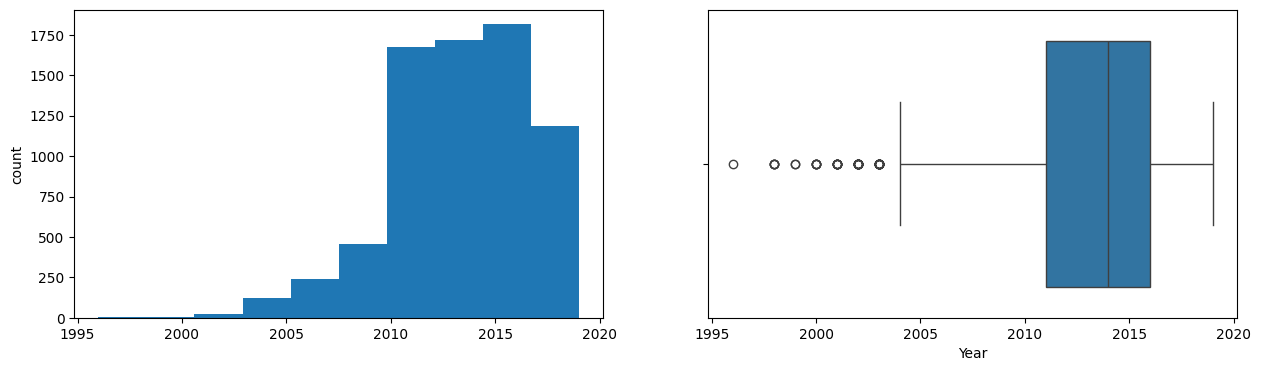

Kilometers_Driven


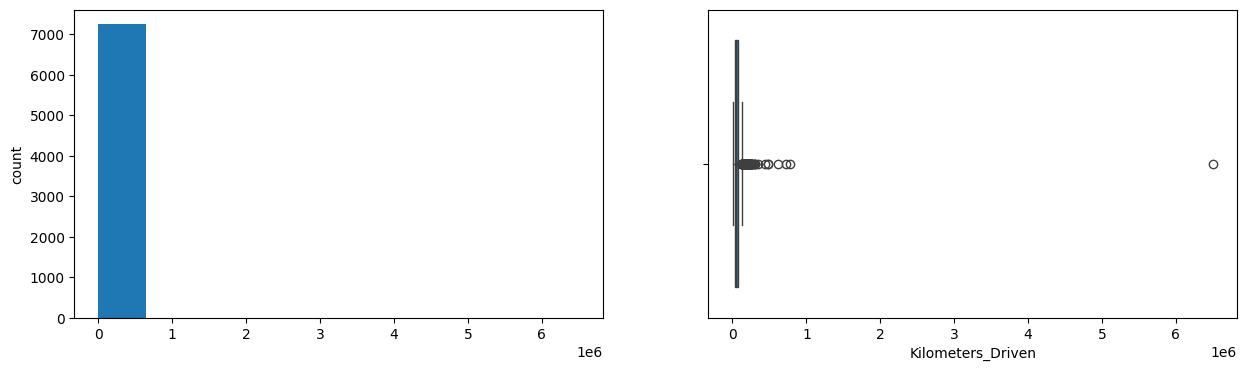

Mileage


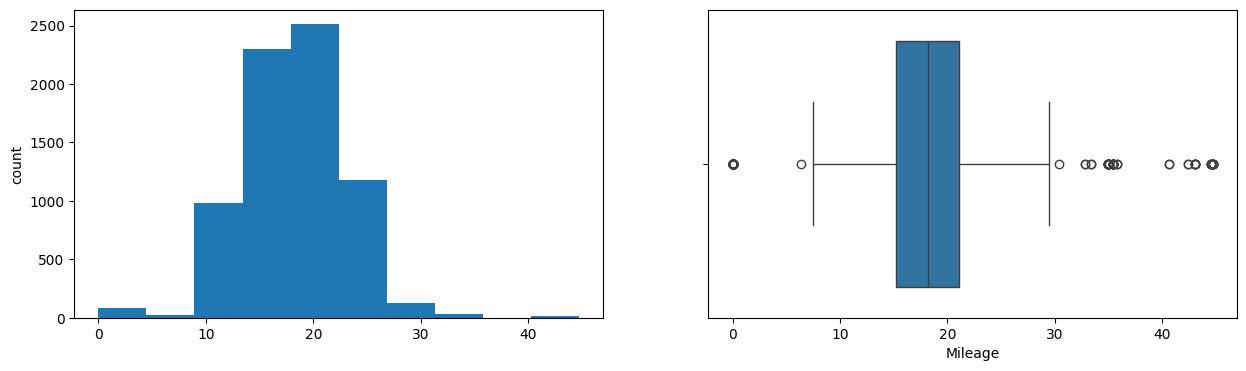

Engine


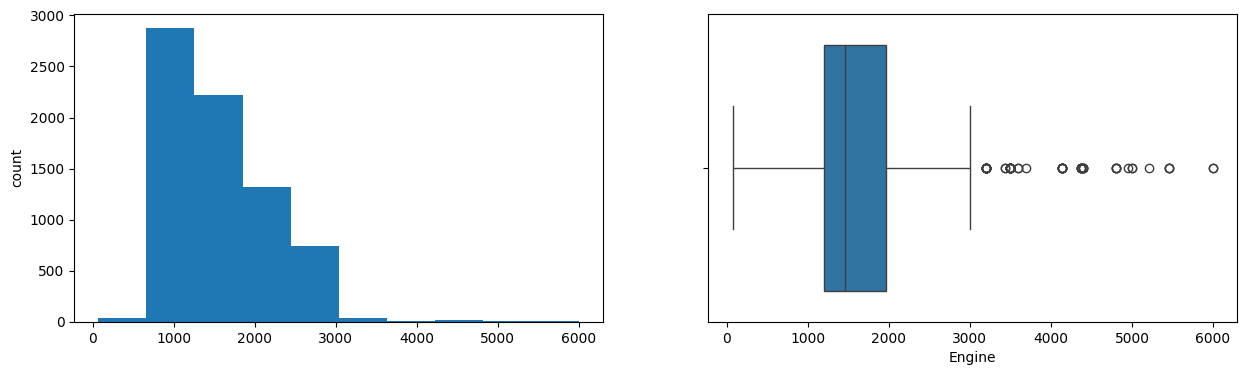

Power


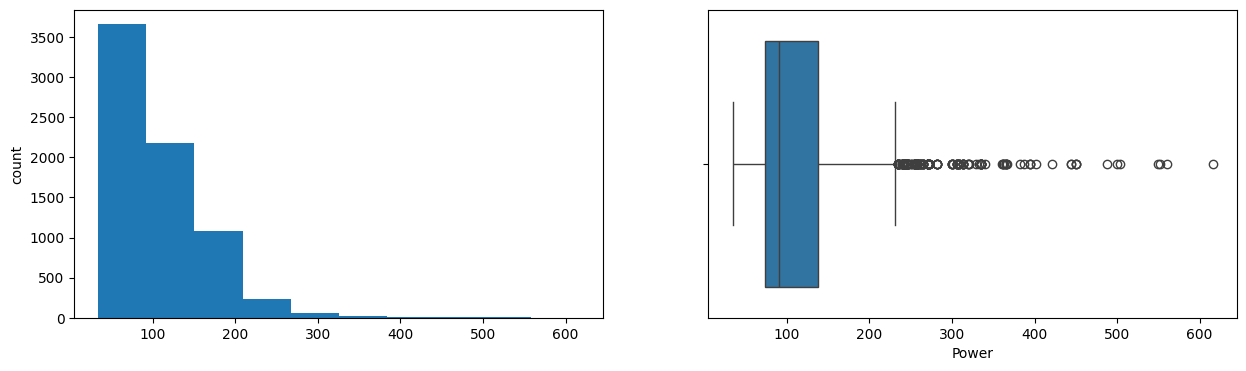

Seats


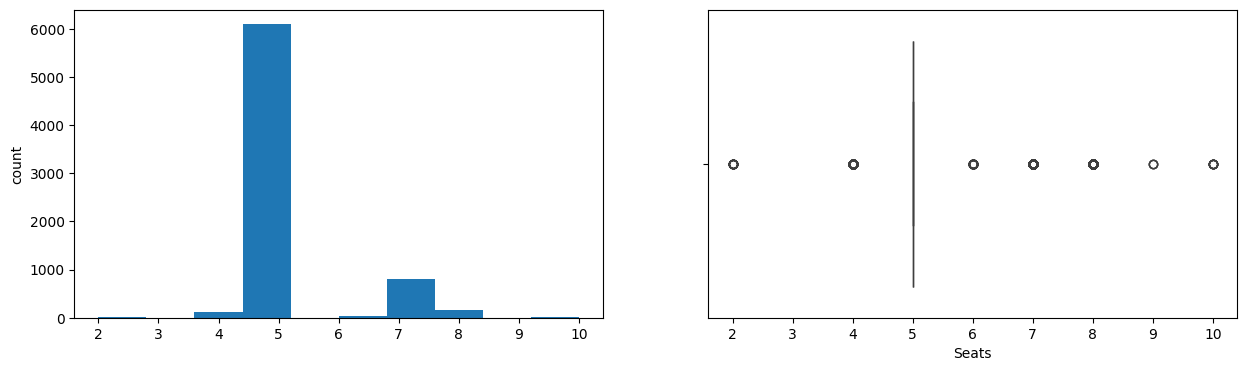

New_Price


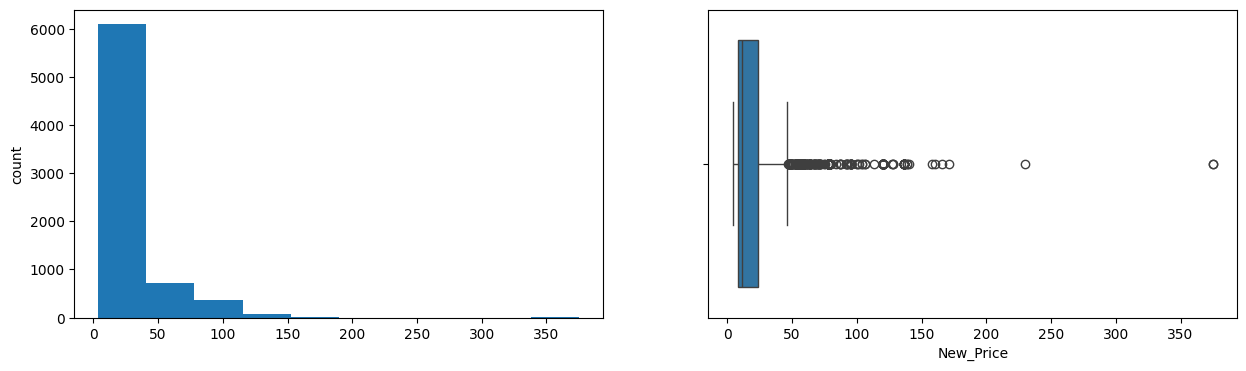

Price


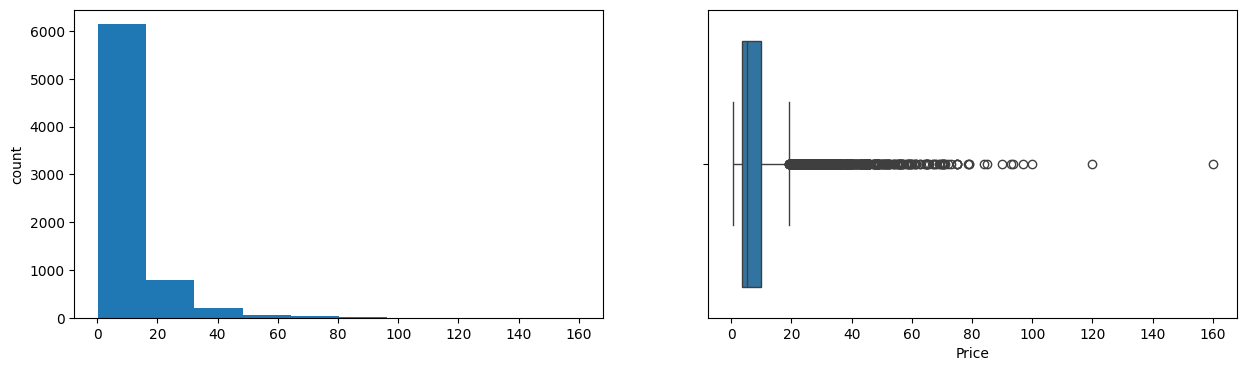

Car_Age


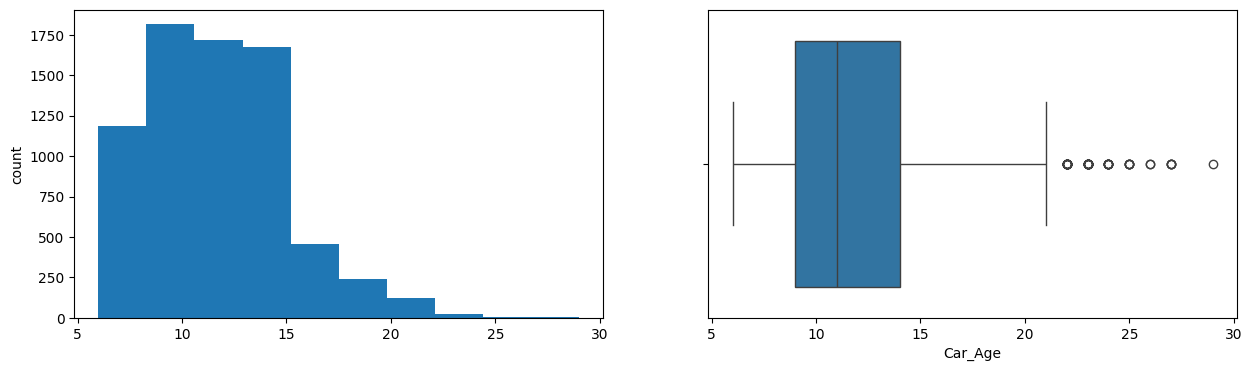

Kilometers_Driven_log


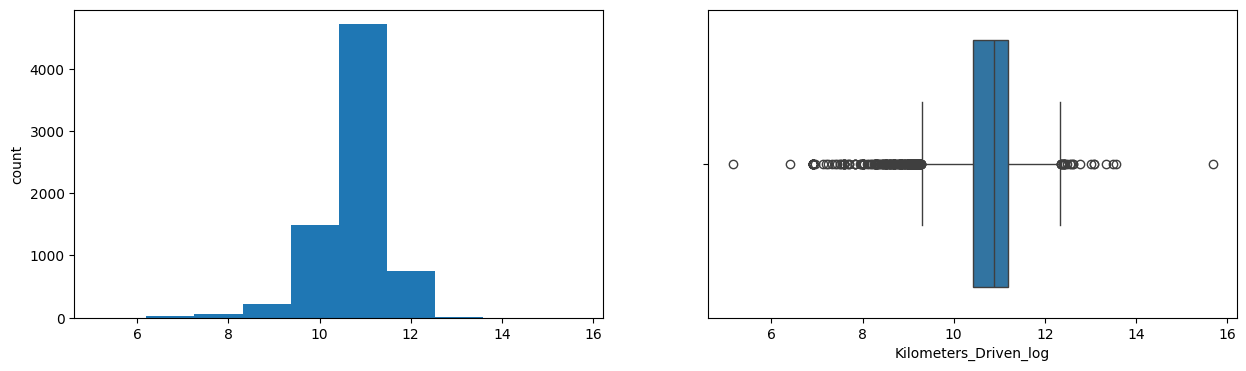

Price_log


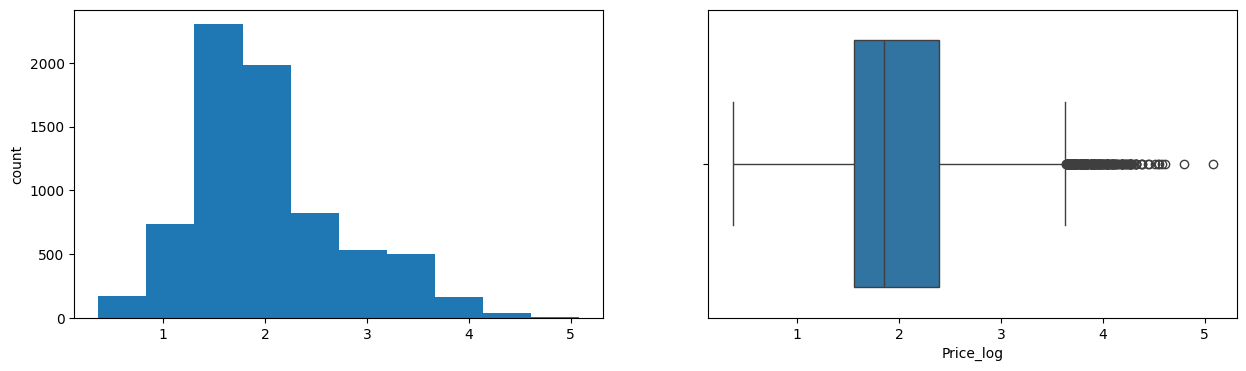

In [60]:
for col in num_cols:
 print(col)
 plt.figure(figsize = (15, 4))
 plt.subplot(1, 2, 1)
 data[col].hist(grid=False)
 plt.ylabel('count')
 plt.subplot(1, 2, 2)
 sns.boxplot(x=data[col])
 plt.show()

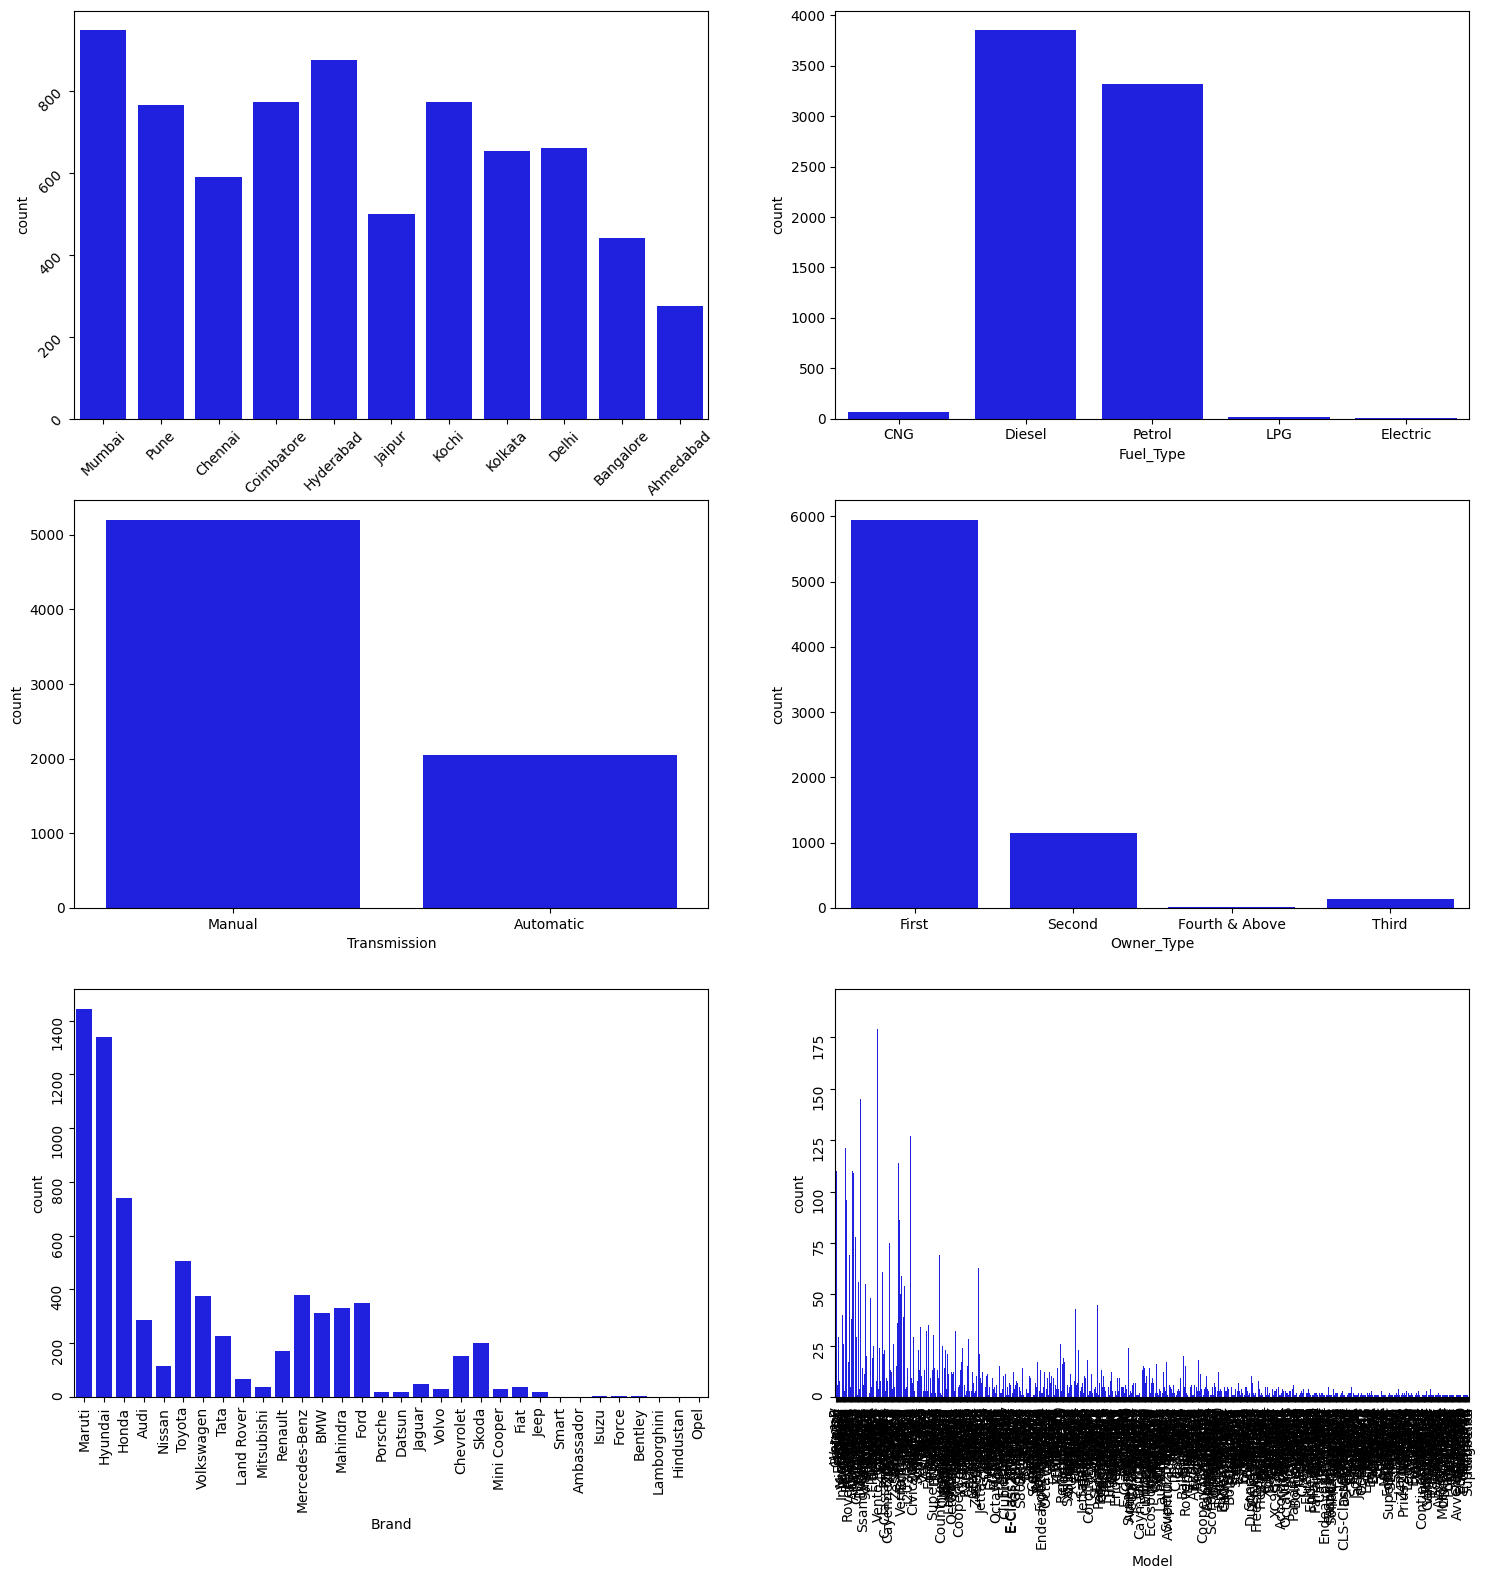

In [61]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
for i in range(len(cat_cols)):
 sns.countplot(ax = axes[i//2, i%2], x = cat_cols[i], data = data, color = 'blue')
axes[0][0].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)
plt.show()

In [67]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < low_bound) | (data[col] > up_bound)][col]
    
    if not outliers.empty:
        print(f"\nParameter: {col}")
        print(f"Min outliers: {outliers.min():.2f}")
        print(f"Max outliers: {outliers.max():.2f}")
        # print(f"Количество выбросов: {outliers.shape[0]}")


Parameter: Year
Min outliers: 1996.00
Max outliers: 2003.00

Parameter: Kilometers_Driven
Min outliers: 131503.00
Max outliers: 6500000.00

Parameter: Mileage
Min outliers: 0.00
Max outliers: 44.71

Parameter: Engine
Min outliers: 3197.00
Max outliers: 5998.00

Parameter: Power
Min outliers: 235.00
Max outliers: 616.00

Parameter: Seats
Min outliers: 2.00
Max outliers: 10.00

Parameter: New_Price
Min outliers: 47.16
Max outliers: 375.00

Parameter: Price
Min outliers: 19.25
Max outliers: 160.00

Parameter: Car_Age
Min outliers: 22.00
Max outliers: 29.00

Parameter: Kilometers_Driven_log
Min outliers: 5.15
Max outliers: 15.69

Parameter: Price_log
Min outliers: 3.64
Max outliers: 5.08


In [68]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

np.int64(81)

In [69]:
data['Mileage'] = data['Mileage'].fillna(value=np.mean(data['Mileage']))
data.Mileage.isnull().sum()

np.int64(0)

In [70]:
data['Kilometers_Driven']= data['Kilometers_Driven'].replace(6500000.00, 650000.00)

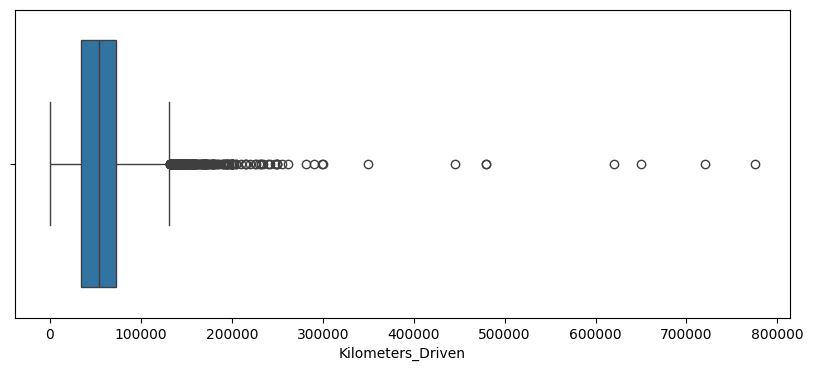

In [76]:
plt.figure(figsize = (10, 4))
sns.boxplot(x=data['Kilometers_Driven'])
plt.show()